In [2]:
%pip install opendatasets 
%pip install seaborn
%pip install seaborn matplotlib
%pip install scipy
%pip install keras
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: torch in c:\python312\lib\site-packages (2.4.1)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd 
import opendatasets as od
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

import pandas as pd  # Importa a biblioteca pandas para manipulação de dados
import torch  # Importa a biblioteca PyTorch
import torch.nn as nn  # Importa o módulo de redes neurais do PyTorch
from sklearn.preprocessing import MinMaxScaler  # Importa o MinMaxScaler para normalização dos dados
from torch.utils.data import DataLoader, TensorDataset  # Importa DataLoader e TensorDataset para manipulação de dados em lotes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import DataLoader, TensorDataset

import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset






In [4]:
# Faz o download do dataset # URL do dataset no Kaggle 
# od.download("https://www.kaggle.com/datasets/hassan06/nslkdd/data")

# Pré-Processamento

In [5]:
df_no_label = pd.read_csv("nslkdd/KDDTrain+.txt", header = None)


In [6]:
# adiciona rótulos as colunas 
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'class_type'
,'level'])

# Carregando os conjuntos de dados de treinamento e teste
train_df = pd.read_csv('nslkdd/KDDTrain+.txt', header=None, names=columns)
test_df = pd.read_csv('nslkdd/KDDTest+.txt', header=None, names=columns)

In [7]:
# Concatenando os DataFrames para criar um único DataFrame
df = pd.concat([train_df, test_df], ignore_index=True)

# Exibindo os tamanhos dos conjuntos resultantes
print(f"Tamanho do Conjunto de Dados Completo: {len(df)}")
print(f"Tamanho do Conjunto de Treinamento: {len(train_df)}")
print(f"Tamanho do Conjunto de Teste: {len(test_df)}")

Tamanho do Conjunto de Dados Completo: 148517
Tamanho do Conjunto de Treinamento: 125973
Tamanho do Conjunto de Teste: 22544


In [8]:
print("Conjunto dos dados completos")
df


Conjunto dos dados completos


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [10]:
df['protocol_type'].value_counts()




protocol_type
tcp     121569
udp      17614
icmp      9334
Name: count, dtype: int64

In [11]:
df['service'].value_counts()


service
http         48191
private      26627
domain_u      9937
smtp          8247
ftp_data      7711
             ...  
tftp_u           4
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

In [12]:
df['flag'].value_counts()


flag
SF        89820
S0        36864
REJ       15083
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: count, dtype: int64

In [13]:
train_df['class_type'].value_counts()


class_type
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

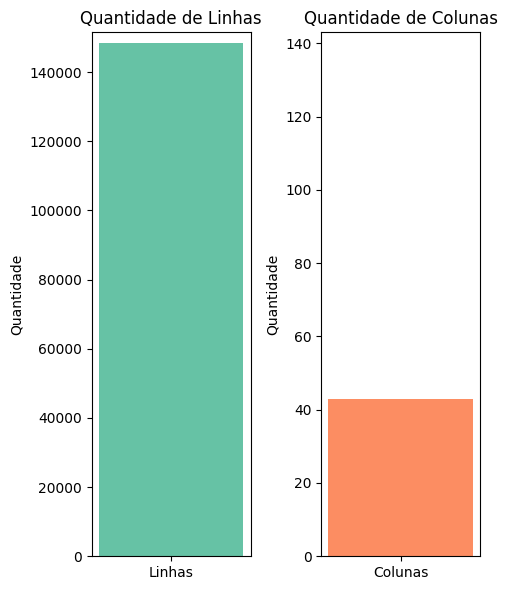

In [14]:
# Obtendo o tamanho do DataFrame
num_rows, num_cols = df.shape

# Criando gráfico de barras para linhas
plt.figure(figsize=(5, 6))

# Gráfico de barras para Linhas
plt.subplot(1, 2, 1)
plt.bar(['Linhas'], [num_rows], color='#66c2a5')
plt.title('Quantidade de Linhas')
plt.ylabel('Quantidade')
plt.ylim(0, num_rows + 3000)  # Ajusta o limite do eixo y para melhor visualização

# Gráfico de barras para Colunas
plt.subplot(1, 2, 2)
plt.bar(['Colunas'], [num_cols], color='#fc8d62')
plt.title('Quantidade de Colunas')
plt.ylabel('Quantidade')
plt.ylim(0, num_cols + 100)  # Ajusta o limite do eixo y para que 43 apareça claramente

# Exibindo os gráficos
plt.tight_layout()  # Ajusta o layout para não sobrepor os gráficos
plt.show()

In [15]:
print("Conjunto de Treinamento")
train_df

Conjunto de Treinamento


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [16]:
print("Conjunto de Teste")
test_df

Conjunto de Teste


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [17]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

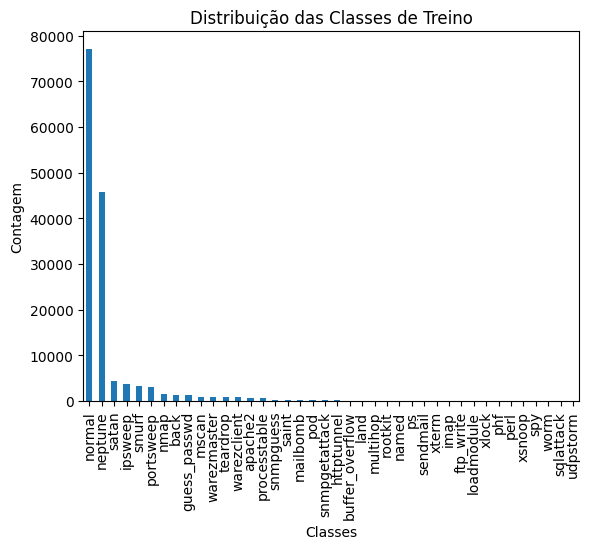

In [18]:
# #distribuição dos dados nas classes 
df["class_type"].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes de Treino')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()


# Pré Processamento

In [19]:
# Dividindo o conjunto de dados em 70% para treinamento e 30% para teste
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [20]:
train_df['class_type'].value_counts()


class_type
normal             53952
neptune            32085
satan               3086
ipsweep             2650
smurf               2311
portsweep           2209
nmap                1083
back                 905
guess_passwd         890
mscan                686
warezmaster          672
teardrop             628
warezclient          609
apache2              521
processtable         462
snmpguess            228
saint                219
mailbomb             207
pod                  172
snmpgetattack        127
httptunnel            88
buffer_overflow       36
multihop              18
rootkit               17
land                  13
ps                    12
named                 11
ftp_write             10
sendmail               9
loadmodule             9
xterm                  8
imap                   7
phf                    6
xlock                  5
perl                   4
xsnoop                 3
udpstorm               2
sqlattack              1
Name: count, dtype: int64

In [21]:
train_df.class_type=train_df.class_type.apply(lambda x: 0 if x == 'normal' else 1)
train_df['class_type'].value_counts()



class_type
0    53952
1    50009
Name: count, dtype: int64

In [22]:
# Filtrar os dados normais
normal_train_df = train_df[train_df['class_type'] == 0]  # 0 representa 'normal'

# Printar a quantidade de dados que sobraram
print('Quantidade de dados normais restantes:')
normal_train_df['class_type'].value_counts()


Quantidade de dados normais restantes:


class_type
0    53952
Name: count, dtype: int64

In [23]:
# Remover a coluna de rótulo
normal_train_df = normal_train_df.drop(columns=['class_type'])


In [24]:
# Imprimir informações sobre o DataFrame, incluindo os nomes das colunas e a quantidade total de colunas
normal_train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53952 entries, 145078 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     53952 non-null  int64  
 1   protocol_type                53952 non-null  object 
 2   service                      53952 non-null  object 
 3   flag                         53952 non-null  object 
 4   src_bytes                    53952 non-null  int64  
 5   dst_bytes                    53952 non-null  int64  
 6   land                         53952 non-null  int64  
 7   wrong_fragment               53952 non-null  int64  
 8   urgent                       53952 non-null  int64  
 9   hot                          53952 non-null  int64  
 10  num_failed_logins            53952 non-null  int64  
 11  logged_in                    53952 non-null  int64  
 12  num_compromised              53952 non-null  int64  
 13  root_shell     

In [25]:
normal_train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [26]:
test_df.class_type=test_df.class_type.apply(lambda x: 0 if x == 'normal' else 1)
test_df['class_type'].value_counts()


class_type
0    23102
1    21454
Name: count, dtype: int64

In [27]:
# Realizando o One-Hot Encoding nas colunas categóricas
#train_df = pd.get_dummies(train_df, columns=['protocol_type', 'service', 'flag'], drop_first=True)
normal_train_df = pd.get_dummies(normal_train_df, columns=['protocol_type', 'service', 'flag'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['protocol_type', 'service', 'flag'], drop_first=True)

# Alinhando os DataFrames de treino e teste para garantir que eles tenham as mesmas colunas
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

# Selecionando apenas as colunas numéricas para normalização
numeric_cols = normal_train_df.select_dtypes(include=['float64', 'int64']).columns

#numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Normalizando os dados numéricos com MinMaxScaler
scaler = MinMaxScaler()
X_train_normal = scaler.fit_transform(normal_train_df[numeric_cols])
# X_train = scaler.fit_transform(train_df[numeric_cols])
X_test = scaler.transform(test_df[numeric_cols])

# Convertendo os dados normalizados para tensores
X_train_tensor_normal = torch.tensor(X_train_normal, dtype=torch.float32)
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32) # Converte a matriz normalizada para um tensor PyTorch com tipo float32
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Separe as features e os rótulos
features = test_df.drop(columns=['class_type']).values  # Substitua 'class_type' pelo nome da coluna de rótulos
labels = test_df['class_type'].values

# Converta os dados para tensores PyTorch
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32)

# Crie um TensorDataset com os dados e os rótulos
test_dataset = TensorDataset(features_tensor, labels_tensor)

# Criando o DataLoader para os dados normais 
train_dataset_normal = TensorDataset(X_train_tensor_normal)
train_loader_normal = DataLoader(train_dataset_normal, batch_size=64, shuffle=True)
# train_dataset = TensorDataset(X_train_tensor) # Cria um conjunto de dados a partir do tensor
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Cria um DataLoader para gerar lotes aleatórios de tamanho 64
test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## Treinando o modelo

In [34]:

# Definindo as dimensões do modelo
#input_dim = X_train.shape[1]  
input_dim= X_train_tensor_normal.shape[1]
hidden_dim1 = 256  # Primeira camada oculta
hidden_dim2 = 128  # Segunda camada oculta
hidden_dim3 = 128
latent_dim =  50   # Dimensões na camada latente

loss_values = []

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)

        self.fc31 = nn.Linear(hidden_dim3, latent_dim)  # Média da distribuição latente
        self.fc32 = nn.Linear(hidden_dim3, latent_dim)  # Log variância da distribuição latente

        self.fc4 = nn.Linear(latent_dim, hidden_dim3)
        self.fc5 = nn.Linear(hidden_dim3, hidden_dim2)
        self.fc6 = nn.Linear(hidden_dim2, hidden_dim1)
        self.fc7 = nn.Linear(hidden_dim1, input_dim)

        self.dropout = nn.Dropout(0.3)  # Aumentando a taxa de dropout

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        h1 = self.dropout(h1)
        h2 = torch.relu(self.fc2(h1))
        h3 = torch.relu(self.fc3(h2))  # Adicionando a camada fc3 corretamente no codificador
        return self.fc31(h3), self.fc32(h3)


    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar) + 1e-6
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h4 = torch.relu(self.fc4(z))
        h5 = torch.relu(self.fc5(h4))
        h6 = torch.relu(self.fc6(h5))
        return torch.sigmoid(self.fc7(h6))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, input_dim))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

model = VAE(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)

# Função de perda usando BCE e KLD
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')  # Usando MSE
    KLD = -0.02 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
num_epochs = 70


# Treinamento
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data,) in enumerate(train_loader_normal):
        optimizer.zero_grad()
        data = data.view(-1, input_dim)
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    train_loss /= len(train_loader_normal.dataset)
    loss_values.append(train_loss)  # Adiciona a perda da época à lista

    print(f'Epoch {epoch + 1} Loss: {train_loss:.4f}')




Epoch 1 Loss: 1.6673
Epoch 2 Loss: 0.8148
Epoch 3 Loss: 0.6423
Epoch 4 Loss: 0.5732
Epoch 5 Loss: 0.5284
Epoch 6 Loss: 0.4954
Epoch 7 Loss: 0.4649
Epoch 8 Loss: 0.4398
Epoch 9 Loss: 0.4105
Epoch 10 Loss: 0.3769
Epoch 11 Loss: 0.3581
Epoch 12 Loss: 0.3436
Epoch 13 Loss: 0.3346
Epoch 14 Loss: 0.3285
Epoch 15 Loss: 0.3227
Epoch 16 Loss: 0.3187
Epoch 17 Loss: 0.3145
Epoch 18 Loss: 0.3109
Epoch 19 Loss: 0.3078
Epoch 20 Loss: 0.3048
Epoch 21 Loss: 0.3020
Epoch 22 Loss: 0.2996
Epoch 23 Loss: 0.2970
Epoch 24 Loss: 0.2945
Epoch 25 Loss: 0.2920
Epoch 26 Loss: 0.2905
Epoch 27 Loss: 0.2877
Epoch 28 Loss: 0.2860
Epoch 29 Loss: 0.2845
Epoch 30 Loss: 0.2829
Epoch 31 Loss: 0.2806
Epoch 32 Loss: 0.2789
Epoch 33 Loss: 0.2780
Epoch 34 Loss: 0.2763
Epoch 35 Loss: 0.2759
Epoch 36 Loss: 0.2745
Epoch 37 Loss: 0.2739
Epoch 38 Loss: 0.2729
Epoch 39 Loss: 0.2726
Epoch 40 Loss: 0.2707
Epoch 41 Loss: 0.2703
Epoch 42 Loss: 0.2693
Epoch 43 Loss: 0.2686
Epoch 44 Loss: 0.2672
Epoch 45 Loss: 0.2674
Epoch 46 Loss: 0.26

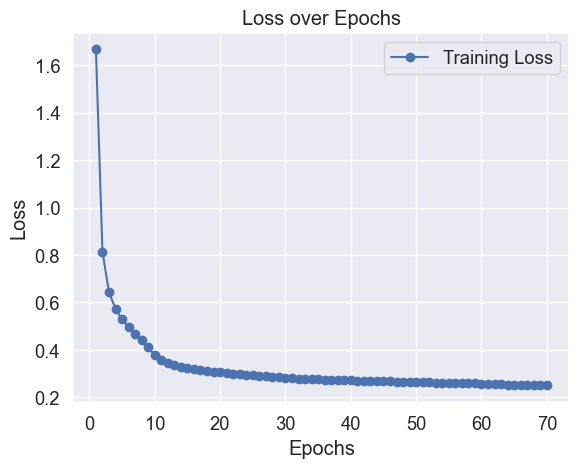

In [35]:

# Gerar gráfico da perda em função das épocas
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', color='b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Validação do Modelo

Accuracy: 0.9899
F1 Score: 0.0000
Recall: 1.0000
Precision: 0.0000
Confusion Matrix:
[[44105   451]
 [    0     0]]


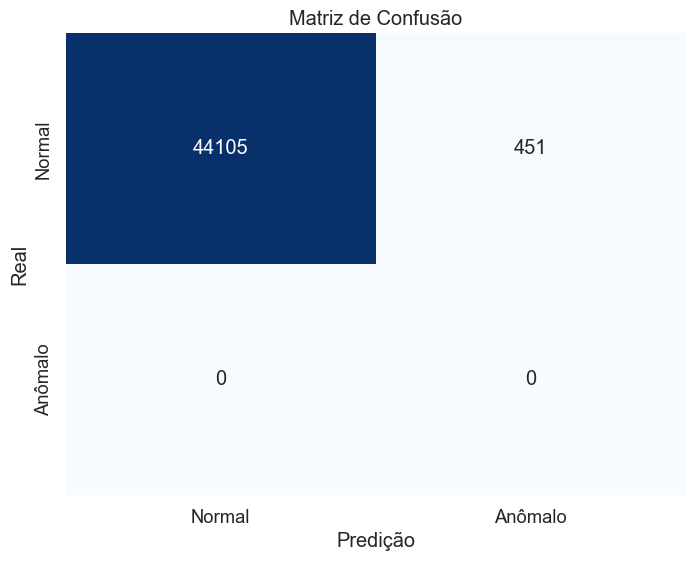

In [36]:
import seaborn as sns
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Função para calcular o erro de reconstrução (MSE)
def reconstruction_error(data, recon_data):
    return ((data - recon_data) ** 2).mean(dim=1)

# Função para calcular métricas de avaliação do modelo com base no limiar de erro
def evaluate_model(model, test_loader, threshold, true_labels):
    model.eval()  # Coloca o modelo em modo de avaliação
    predictions = []  # Lista para armazenar as predições do modelo

    with torch.no_grad():  # Desativa a autograd para economia de memória
        for data in test_loader:  # Usando o test_loader aqui
            data = data[0].view(-1, input_dim)  # Redimensiona os dados para o input esperado pelo modelo
            recon_data, _, _ = model(data)  # Reconstrói os dados com o modelo

            # Calcula o erro de reconstrução
            errors = reconstruction_error(data, recon_data)
            
            # Classifica como 1 (anômalo) se erro > threshold; 0 (normal) caso contrário
            pred = (errors > threshold).float()
            predictions.extend(pred.cpu().numpy())  # Garante a conversão correta para numpy

    # Converte listas de predições e rótulos verdadeiros para arrays numpy para cálculo das métricas
    predictions = np.array(predictions)
    true_labels = np.array(true_labels)

    # Calcula as métricas
    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='binary')
    recall = recall_score(true_labels, predictions, average='binary', zero_division=1)
    precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
    confusion = confusion_matrix(true_labels, predictions)

    # Exibe os resultados das métricas
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Confusion Matrix:\n{confusion}")
    
    return accuracy, f1, recall, precision, confusion

# Função para plotar a matriz de confusão
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Aumenta o tamanho da fonte para melhor visualização
    
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=['Normal', 'Anômalo'], yticklabels=['Normal', 'Anômalo'])
    
    plt.title("Matriz de Confusão")
    plt.xlabel("Predição")
    plt.ylabel("Real")
    plt.show()

# Defina o limiar (threshold)
threshold = 0.08  # Ajuste o valor do limiar conforme necessário

# Supondo que você tenha rótulos verdadeiros para os dados de teste (y_test)
true_labels = [0] * len(test_loader.dataset)  # todos rótulos como 0 (normal) ou altere conforme necessário

# Avalie o modelo usando o DataLoader de teste e exiba as métricas
accuracy, f1, recall, precision, confusion = evaluate_model(model, test_loader, threshold, true_labels)

# Chame a função para plotar a matriz de confusão
plot_confusion_matrix(confusion)


In [31]:
# Verificar se existem dados anômalos no test_loader
anomalous_data_found = False  # Variável para verificar se encontramos dados anômalos

# Supondo que você tenha os rótulos armazenados em uma lista ou tensor separado
# Aqui vamos assumir que você tem `true_labels`, que contém os rótulos corretos para os dados

for data in test_loader:
    # O test_loader pode estar retornando apenas os dados, então os rótulos precisam ser extraídos de algum lugar
    # Se os rótulos não estiverem em `test_loader`, você pode precisar acessá-los em um vetor externo, como `true_labels`
    
    # Verifique se o índice atual corresponde a um dado rotulado como anômalo
    # Aqui estou assumindo que `true_labels` já contém os rótulos (0 = normal, 1 = anômalo)
    # E que `test_loader` está retornando os dados apenas.
    
    # Como `test_loader` retorna apenas os dados, você deve comparar os rótulos do conjunto de teste com a lista ou array de rótulos:
    for i, label in enumerate(true_labels):
        if label == 1:  # Se o rótulo for 1, é um dado anômalo
            anomalous_data_found = True
            break  # Se encontrarmos dados anômalos, podemos parar a iteração

    if anomalous_data_found:
        break  # Interrompe a iteração se já encontrou dados anômalos

# Resultado
if anomalous_data_found:
    print("Existem dados anômalos no test_loader.")
else:
    print("Não existem dados anômalos no test_loader.")

Não existem dados anômalos no test_loader.
